In [ ]:
import keras
from keras.models import Sequential
from keras.layers import Conv2D, Flatten, MaxPool2D, Dense, Dropout

In [ ]:
model = Sequential()
model.add(Conv2D(64, kernel_size=(7,7),padding='same',input_shape=(28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(128,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(Conv2D(256,kernel_size=(3,3),activation='relu',padding='same'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(10,activation='softmax'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 64)        3200      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 64)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 128)       73856     
                                                                 
 conv2d_2 (Conv2D)           (None, 14, 14, 128)       147584    
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 128)        0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 256)         2

In [ ]:
import tensorflow as tf
import numpy as np

In [ ]:
tf.random.set_seed(221)
np.random.seed(221)

In [ ]:
data = tf.keras.datasets.fashion_mnist

In [ ]:
(train_img, train_lbl),(test_img, test_lbl) = data.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
len(train_img)

60000

In [ ]:
len(test_img)

10000

In [ ]:
train_img.shape

(60000, 28, 28)

In [ ]:
#adding channel
train_img = train_img.reshape(60000,28,28,1)

In [ ]:
#scale train_img
train_img = train_img/255.0

In [ ]:
#same for test data
test_img = test_img.reshape(10000,28,28,1)
test_img = test_img/255.0

In [ ]:
train_lbl_5 = (train_lbl==5)

In [ ]:
test_lbl_5 = (test_lbl==5)

In [ ]:
model.compile(loss='sparse_categorical_crossentropy', optimizer=keras.optimizers.SGD(), metrics=['accuracy'])

In [ ]:
history = model.fit(train_img, train_lbl, epochs=10, validation_data = (test_img, test_lbl))

Epoch 1/10
1875/1875 [==============================] - 21s 6ms/step - loss: 0.8634 - accuracy: 0.6772 - val_loss: 0.6352 - val_accuracy: 0.7667
Epoch 2/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4935 - accuracy: 0.8174 - val_loss: 0.4615 - val_accuracy: 0.8297
Epoch 3/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.4101 - accuracy: 0.8490 - val_loss: 0.4134 - val_accuracy: 0.8450
Epoch 4/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3667 - accuracy: 0.8644 - val_loss: 0.3925 - val_accuracy: 0.8555
Epoch 5/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.3382 - accuracy: 0.8749 - val_loss: 0.3803 - val_accuracy: 0.8588
Epoch 6/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.3161 - accuracy: 0.8821 - val_loss: 0.3575 - val_accuracy: 0.8720
Epoch 7/10
1875/1875 [==============================] - 14s 7ms/step - loss: 0.2982 - accuracy: 0.8896 - val_loss: 0.3251 - val_ac

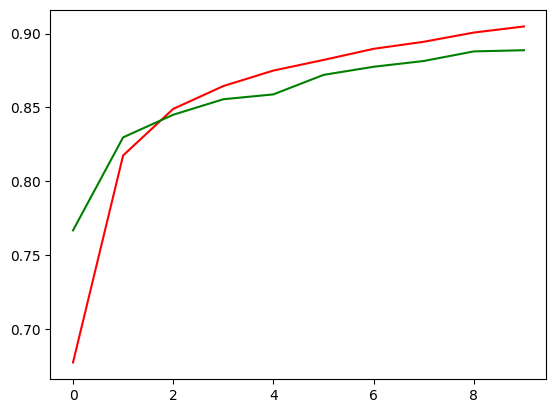

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],'r-')
plt.plot(history.history['val_accuracy'],'g-')
plt.show()

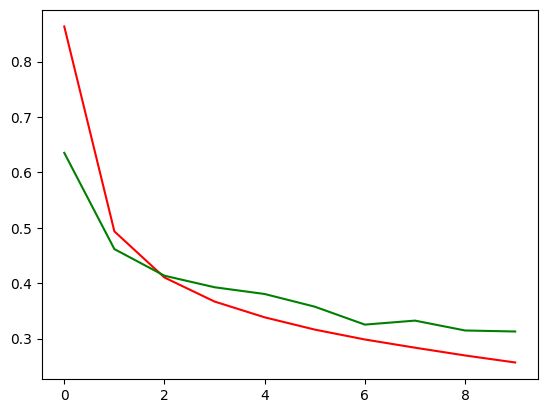

In [ ]:
plt.plot(history.history['loss'],'r-')
plt.plot(history.history['val_loss'],'g-')
plt.show()